# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
# Note: Files are in a local Datasets directory for clarity purpose
human_files = np.array(glob("../../Datasets/lfw/*/*"))
dog_files = np.array(glob("../../Datasets/dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13231 total human images.
There are 8535 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


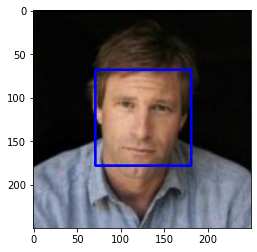

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 96 human faces were correctly detected while 18 dog faces were incorrectly detected as humans. Hence, the accuracy for human images is 96% and for dog images is 82%.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_faces_count = 0
dog_faces_count = 100

for img in tqdm(human_files_short):
    if face_detector(img):
        human_faces_count += 1

for img in tqdm(dog_files_short):
    if face_detector(img):
        dog_faces_count -= 1

print('Human faces correctly detected: ', human_faces_count)
print('Human faces undetected: ', 100-human_faces_count)
print('Dog faces correctly detected: ', dog_faces_count)
print('Dog faces incorrectly detected as human: ', 100-dog_faces_count)

100%|███████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 21.46it/s]

Human faces correctly detected:  96
Human faces undetected:  4
Dog faces correctly detected:  82
Dog faces incorrectly detected as human:  18


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

In [6]:
def face_detector_alt(img_path):
    '''
    Using a different CascadeClassifier from cv2 to check whether or not a face of a person is present in an image.
    Args:
        img_path: path to an image
    Returns:
        Return true, if a face of a person is present on the image. Else return false
    '''
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [7]:
human_faces_count = 0
dog_faces_count = 100

for img in tqdm(human_files_short):
    if face_detector_alt(img):
        human_faces_count += 1

for img in tqdm(dog_files_short):
    if face_detector_alt(img):
        dog_faces_count -= 1

print('Human faces correctly detected: ', human_faces_count)
print('Human faces undetected: ', 100-human_faces_count)
print('Dog faces correctly detected: ', dog_faces_count)
print('Dog faces incorrectly detected as human: ', 100-dog_faces_count)

100%|███████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.64it/s]

Human faces correctly detected:  100
Human faces undetected:  0
Dog faces correctly detected:  41
Dog faces incorrectly detected as human:  59


Using `haarcascade_frontalface_alt2`, we detected 98 human images correctly and incorrectly detected 23 dog images as humans.

Using `haarcascade_frontalface_default`, we detected all 100 human images correctly and 59 dog images were incorrectly detected as humans.

Hence, the accuracy of the __Human Face Detector__ has been increased to 100%. To detect the dogs, we will use CNNs.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [8]:
import torch
import torchvision.models as models

# define VGG-16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [9]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def pretrained_predict(img_path, model):
    '''
    Use pre-trained models to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        model:    Pretrained model to use
        
    Returns:
        Index corresponding to pretrained model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Normalization values for image
    normalize = transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))

    # Image transformations
    transform = transforms.Compose([transforms.Resize(224),
                                    transforms.ToTensor(),
                                    normalize])
    
    # Load image from path
    img = Image.open(img_path).convert('RGB')
    
    # Transform the image
    img = transform(img).float()
    
    # Transform tensor into a 1-dimension vector
    img = img.unsqueeze(0)
    
    # Convert img to a Variable.
    img = Variable(img)

    # Use CUDA-enabled GPU to store tensor, if available
    if use_cuda:
        img = img.cuda()
            
    # Obtain model prediction
    with torch.no_grad():
        output = model(img)
        prediction = torch.argmax(output).item()
        
    # Releases all unoccupied cached GPU memory 
    torch.cuda.empty_cache()
    
    return prediction # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path, model):
    ## TODO: Complete the function.
    
    prediction = pretrained_predict(img_path, model)
    return True if 151 <= prediction <= 268 else False # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ The __Dog Detector__ module gives 94% accuracy on the sample dog images and 100% accuracy (no incorrectly detected image) on the sample human images.


In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

dogs_human_files_VGG16_count = 0
dogs_dog_files_VGG16_count = 0

for file in tqdm(human_files_short, desc='human_files'):
    if dog_detector(file, VGG16):
        dogs_human_files_VGG16_count += 1

for file in tqdm(dog_files_short, desc='dog_files'):
    if dog_detector(file, VGG16):
        dogs_dog_files_VGG16_count += 1

print('Dogs detected in "human_files_short": {}%'.format(dogs_human_files_VGG16_count / len(human_files_short) * 100))
print('Dogs detected in "dog_files_short": {}%'.format(dogs_dog_files_VGG16_count / len(dog_files_short) * 100))

dog_files: 100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.59it/s]

Dogs detected in "human_files_short": 1.0%
Dogs detected in "dog_files_short": 93.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_dir = '../../Datasets/dogImages'

# Normalization values for image
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# Train images transformation
train_transforms = transforms.Compose([transforms.Resize(256),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(10),
                                       transforms.ToTensor(),
                                       normalize])

# Test images transformation
test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      normalize])

# Validation images transformation
valid_transforms  = transforms.Compose([transforms.Resize(256),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        normalize])

# Create dataset variables
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_transforms)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=test_transforms)
valid_dataset = datasets.ImageFolder(os.path.join(data_dir, 'valid'), transform=valid_transforms)

# Train data loader 
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=20,
                                           shuffle=True,
                                           num_workers=0)

# Test data loader
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=20,
                                          shuffle=False,
                                          num_workers=0)

# Validation data loader
valid_loader = torch.utils.data.DataLoader(valid_dataset,
                                           batch_size=20,
                                           shuffle=True,
                                           num_workers=0)

# Put data loaders to a dictionary
loaders_scratch = {"train" : train_loader, "test" : test_loader, "valid" : valid_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: The images are transformed by data augmentation techniques.

* The training data is resized, randomly cropped and resized, randomly flipped horizontally, and randomly rotated with angle 10°.
* The test data and validation data are only resized and center cropped.

Resizing to `256 x 256` is the standard resolution for most images. Furthermore, center cropping to `224 x 224` proves beneficial as most pretrained models use this size, so it also allows easy comparison with the benchmark model.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d( 3, 32, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.conv3 = nn.Conv2d( 64, 128, 3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 128, 3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(14*14*128, 4096)
        self.fc2 = nn.Linear(4096, 134)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = x.view(-1, 14*14*128)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ The model was designed with inspiration from several popular pre-trained models (VGG-16, Inception V3, ImageNet, ... etc). As the GPU requirements are particulary high for these models, a _pooling layer_ was added after every _convolutional layer_. This would reduce the number of features and not overload the GPU, crashing the kernel.

The model is designed as follows:
1. Convolutional Layer with 3 input dimensions and 32 output dimensions - kernel size 3
   * Relu Activation function


2. Pooling layer - kernel size 2
  
3. Convolutional Layer with 32 input dimensions and 64 output dimensions - kernel size 3
   * Relu Activation function


4. Pooling layer - kernel size 2

5. Convolutional Layer with 64 input dimensions and 128 output dimensions - kernel size 3
   * Relu Activation function


6. Pooling layer - kernel size 2

7. Convolutional Layer with 128 input dimensions and 128 output dimensions - kernel size 3
   * Relu Activation function


8.  Pooling layer - kernel size 2

9.  Flatten layer to convert the pooled feature maps to a single vector with a length of 25088
    * Dropout with a probability of 0.25


10. Fully connected Linear Layer with an input size of 25088 and an output size of 4096
    * Relu Activation function
    * Dropout with a probability of 0.25


11. Fully connected Linear Layer with an input size of 4096 and an output size of 134

__There are 134 neurons in the final class!__ This is because the dataset sources were checked and validated against the original.

The LFW dataset is obtained from [_University of Massachusetts Amherst_](http://vis-www.cs.umass.edu/lfw/).<br/>
The Dogs Dataset is based on the original [_Stanford Dogs Dataset_](http://vision.stanford.edu/aditya86/ImageNetDogs/).

Udacity's dataset for dogs contains 133 breeds which matches with the original Stanford dataset. Matching the files names alphabetically, the __Miniature Pinscher__ breed was missing. It is important to note that verifying data sources is an underrated method of verifying the authenticity of data. It has proved beneficial in our case as we are now able to correctly recognize all the breeds. The train, test and valid images for this is distributed as 164, 10, 10 respectively, to decrease data imbalance.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [15]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [16]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            
            # update training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(
                  valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [17]:
# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# Releases all unoccupied cached GPU memory 
torch.cuda.empty_cache()

Epoch: 1 	Training Loss: 4.860087 	Validation Loss: 4.766184
Validation loss decreased (inf --> 4.766184). Saving model...
Epoch: 2 	Training Loss: 4.785383 	Validation Loss: 4.645022
Validation loss decreased (4.766184 --> 4.645022). Saving model...
Epoch: 3 	Training Loss: 4.704164 	Validation Loss: 4.564157
Validation loss decreased (4.645022 --> 4.564157). Saving model...
Epoch: 4 	Training Loss: 4.629865 	Validation Loss: 4.500917
Validation loss decreased (4.564157 --> 4.500917). Saving model...
Epoch: 5 	Training Loss: 4.542910 	Validation Loss: 4.462083
Validation loss decreased (4.500917 --> 4.462083). Saving model...
Epoch: 6 	Training Loss: 4.502013 	Validation Loss: 4.733835
Epoch: 7 	Training Loss: 4.444770 	Validation Loss: 4.513839
Epoch: 8 	Training Loss: 4.382448 	Validation Loss: 5.096463
Epoch: 9 	Training Loss: 4.354650 	Validation Loss: 4.780600
Epoch: 10 	Training Loss: 4.277990 	Validation Loss: 4.478402
Epoch: 11 	Training Loss: 4.231896 	Validation Loss: 4.6263

In [18]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.205770


Test Accuracy: 23% (198/846)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [20]:
## TODO: Specify data loaders
# Using data loaders from previous CNN model
# Put data loaders to a dictionary
loaders_transfer = {"train" : train_loader, "valid" : valid_loader, "test" : test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [21]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = models.resnext101_32x8d(pretrained=True)

# Add a Dropout layer
model_transfer.add_module('drop', nn.Dropout(0.3))

# Add a fully-connected last layer
model_transfer.add_module('fc1', nn.Linear(in_features=1000, out_features=134, bias=True))

# Freeze parameter training
for param in model_transfer.parameters():
    param.requires_grad = False

# Fine tuning model by replacing last 3 years with requires_grad=True by default 
model_transfer.fc = nn.Linear(2048, 1000, bias=True)
model_transfer.drop = nn.Dropout(0.3)
model_transfer.fc1 = nn.Linear(in_features=1000, out_features=134, bias=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ The ResNext-101 model is chosen for Transfer Learning as it has a lower Top-1 error rate than the ResNet-50 model. All the parameters of the model are frozen and and the fully-connected layer `fc` repalced to reset the classifier for fine-tuning. An additional dropout layer `drop` and another fully-connected layer `fc` are added.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [22]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr = 0.01, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [23]:
# train the model
n_epochs = 40
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer,
                       criterion_transfer, use_cuda, 'model_transfer.pt')

# Releases all unoccupied cached GPU memory 
torch.cuda.empty_cache()

Epoch: 1 	Training Loss: 2.165929 	Validation Loss: 0.634438
Validation loss decreased (inf --> 0.634438). Saving model...
Epoch: 2 	Training Loss: 1.100956 	Validation Loss: 0.512155
Validation loss decreased (0.634438 --> 0.512155). Saving model...
Epoch: 3 	Training Loss: 1.026018 	Validation Loss: 0.509159
Validation loss decreased (0.512155 --> 0.509159). Saving model...
Epoch: 4 	Training Loss: 0.930960 	Validation Loss: 0.415216
Validation loss decreased (0.509159 --> 0.415216). Saving model...
Epoch: 5 	Training Loss: 0.872829 	Validation Loss: 0.410425
Validation loss decreased (0.415216 --> 0.410425). Saving model...
Epoch: 6 	Training Loss: 0.866653 	Validation Loss: 0.343626
Validation loss decreased (0.410425 --> 0.343626). Saving model...
Epoch: 7 	Training Loss: 0.813614 	Validation Loss: 0.456481
Epoch: 8 	Training Loss: 0.818848 	Validation Loss: 0.422102
Epoch: 9 	Training Loss: 0.804311 	Validation Loss: 0.372357
Epoch: 10 	Training Loss: 0.778791 	Validation Loss: 0

In [24]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [25]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.376231


Test Accuracy: 87% (737/846)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [26]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

from torch.autograd import Variable

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path, model, top_k, use_cuda):
    '''
    Function to return top-k predictions of the dog breed predicted by the model, on the given
    image provided as a path.
        
    Args:
        img_path: path to an image
        model:    model for prediction
        top_k:    desired top-k-numbers of predictions.
        use_cuda: Use CUDA-enabled GPU if available
    Returns:
        Returns top-k predictions and top-k labels in an array
    '''
    
    
    # Normalization values
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    
    # Image transformations
    transform = transforms.Compose([transforms.Resize(256),
                                         transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         normalize])
    
    # Setting evaluation mode on
    model.eval()
    
    # Load image from path
    img = Image.open(img_path).convert('RGB')
    
    # Transform the image
    img = transform(img).float()
    
    # Transform tensor into a 1-dimension vector
    img = img.unsqueeze(0)
    
    # Convert img to a Variable.
    img = Variable(img)
    
    # Use CUDA-enabled GPU to store tensor, if available else CPU
    if use_cuda:
        img = img.cuda()
    
    # Predict the breed
    prediction = model(img)
    
    # Convert prediction to related index
    index = prediction.data.cpu().numpy().argmax()
    
    # Get top-k predictions
    top_k_predictions = torch.topk(prediction, top_k)
    
    # Using softmax function for calculating probabilites
    softmax = nn.Softmax(dim=1)
    top_k_probabilities = softmax(top_k_predictions.values).cpu().detach().numpy()[0]
    
    # Get top-k indices
    top_k_indices = top_k_predictions.indices.cpu().detach().numpy()[0]
    top_k_labels = [class_names[k] for k in top_k_indices]    
    
    torch.cuda.empty_cache()
    
    # return class_name
    return [top_k_probabilities, top_k_labels]

In [27]:
# Save class_names to text-file
with open('class_names.txt', 'w') as f:
    for item in class_names:
        f.write("%s\n" % item)

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [30]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path, model, use_cuda, top_k=3):
    '''
    This function checks if a dog or a human is present on a picture and
    shows the image and the top-k predictions of the corresponding dog breed
    If no dog or human is detected, a corresponding message is returned.
    
    Args:
        img_path: path to an image
        model:    model for inference
        topk:     desired top-k-numbers of predictions
    Returns:
        Nothing
    '''
    
    # Show image
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    
    dog_detected = False
    human_detected = False
    
    # Set limits for top-k
    if top_k > 10:
        top_k = 10
    if top_k < 1:
        top_k = 1
    
    # Detect dog or human
    if dog_detector(img_path, VGG16):
        dog_detected = True
        print('Hello dog! Here are the predictions for your dog breed')
    elif face_detector_alt(img_path):
        human_detected = True
        print('Hello human! If you were a dog, you could look like')
    else:
        print('Oh... No dog or human could be identified.')
    
    # Get and print predictions
    if dog_detected or human_detected:
        top_k_predictions = predict_breed_transfer(img_path, model, top_k, use_cuda)
        for k in range(top_k):
            print('Top {0:2} prediction:{1:7.2f}% - {2}'.format(k+1, top_k_predictions[0][k]*100, top_k_predictions[1][k]))

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The output of the model exceeds expectations. However, it can be improved, overall, as follows -
* Fine tuning the model further to increase accuracy. This includes, but not limited to, increasing the no. of epochs, using better optimizers etc.
* Developing a web app for public visibility and checking model accuracy in the real world.
* Improving the algorithm's model to detect both dogs and humans present simultaneously in any image.

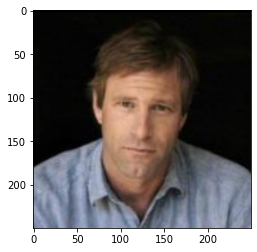

Hello human! If you were a dog, you could look like
Top  1 prediction:  70.74% - Miniature pinscher
Top  2 prediction:  23.65% - Dachshund
Top  3 prediction:   5.61% - Silky terrier


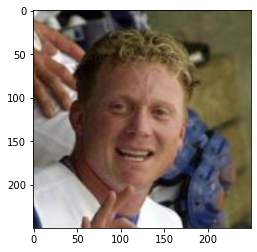

Hello human! If you were a dog, you could look like
Top  1 prediction:  78.58% - Lowchen
Top  2 prediction:  10.80% - American water spaniel
Top  3 prediction:  10.62% - Miniature pinscher


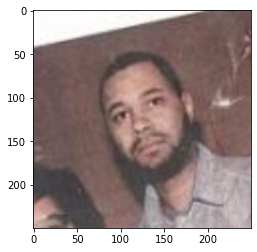

Hello human! If you were a dog, you could look like
Top  1 prediction:  92.26% - American water spaniel
Top  2 prediction:   4.42% - Bearded collie
Top  3 prediction:   3.31% - Irish water spaniel


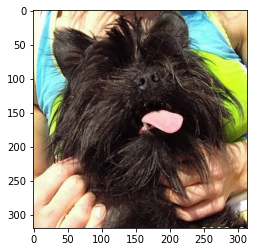

Hello dog! Here are the predictions for your dog breed
Top  1 prediction:  99.56% - Affenpinscher
Top  2 prediction:   0.44% - Brussels griffon
Top  3 prediction:   0.00% - Havanese


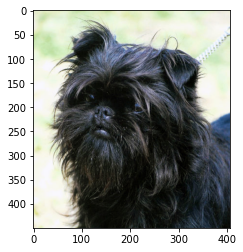

Hello dog! Here are the predictions for your dog breed
Top  1 prediction:  98.19% - Affenpinscher
Top  2 prediction:   1.81% - Brussels griffon
Top  3 prediction:   0.00% - Kerry blue terrier


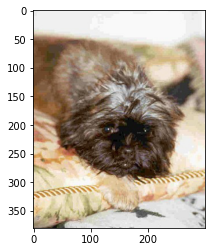

Hello dog! Here are the predictions for your dog breed
Top  1 prediction:  79.14% - Affenpinscher
Top  2 prediction:  20.85% - Brussels griffon
Top  3 prediction:   0.01% - Lhasa apso


In [31]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file, model_transfer, use_cuda, top_k=3)

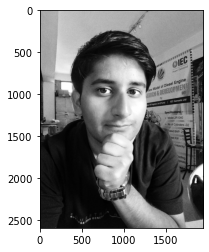

Hello human! If you were a dog, you could look like
Top  1 prediction:  54.42% - Lowchen
Top  2 prediction:  34.15% - Affenpinscher
Top  3 prediction:  11.42% - Silky terrier


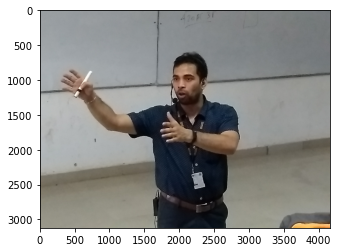

Hello human! If you were a dog, you could look like
Top  1 prediction:  70.27% - Xoloitzcuintli
Top  2 prediction:  18.60% - Ibizan hound
Top  3 prediction:  11.13% - Italian greyhound


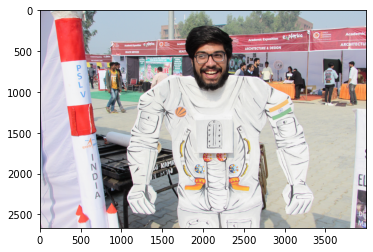

Hello human! If you were a dog, you could look like
Top  1 prediction:  69.43% - Afghan hound
Top  2 prediction:  17.71% - Dachshund
Top  3 prediction:  12.86% - Lowchen


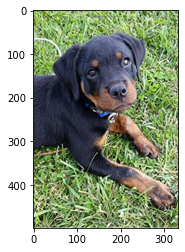

Hello dog! Here are the predictions for your dog breed
Top  1 prediction:  96.05% - Beauceron
Top  2 prediction:   2.13% - Miniature pinscher
Top  3 prediction:   1.82% - Black and tan coonhound


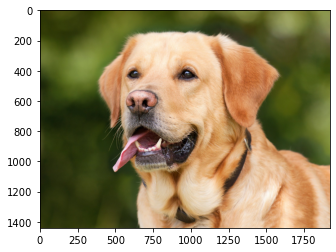

Hello dog! Here are the predictions for your dog breed
Top  1 prediction:  99.70% - Golden retriever
Top  2 prediction:   0.29% - Labrador retriever
Top  3 prediction:   0.01% - Nova scotia duck tolling retriever


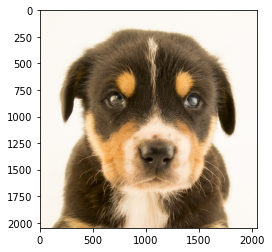

Hello dog! Here are the predictions for your dog breed
Top  1 prediction:  99.84% - Greater swiss mountain dog
Top  2 prediction:   0.15% - Entlebucher mountain dog
Top  3 prediction:   0.01% - Anatolian shepherd dog


In [32]:
# Predictions on user images
user_images = np.array(glob("user_images/*"))

for file in user_images:
    run_app(file, model_transfer, use_cuda, top_k=3)

__END OF NOTEBOOK__